## average AOD for region 

## imports
Python package list:
- pyhdf
- numpy
- sys
- mpl_toolkits.basemap
- matplotlib
- linearSegmented Colormap
- h5py
- time
- calendar

In [1]:
import os
import awscli as aws
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date 
from datetime import time

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from shapely import geometry


import matplotlib.pyplot as plt
import xarray as xr
import scipy.stats as ss 
import metpy  
import os
import rioxarray
import rasterio
import h5py    
from pyhdf import SD
from mpl_toolkits.basemap import Basemap
import colormap
import time
import calendar
import h5pyd
from matplotlib.patches import Polygon


In [2]:
# june 15
path15 = '/data/edworak/aod_june15/'
list_names15 = os.listdir(path15)
print(list_names15) 

# june 29
path29 = '/data/edworak/aod_june29/'
list_names29 = os.listdir(path29)
print(list_names29)

# june 28
path28 = '/data/edworak/aod_june28/'
list_names28 = os.listdir(path28)
print(list_names28)

['MYD04_3K.A2021166.1915.061.2021167152532.hdf', 'MYD04_3K.A2021166.1920.061.2021167152922.hdf', 'MYD04_3K.A2021166.2055.061.2021167153002.hdf', 'MYD04_3K.A2021166.2100.061.2021167152955.hdf']
['MYD04_3K.A2021180.1130.061.2021181154547.hdf', 'MYD04_3K.A2021180.1930.061.2021181154837.hdf', 'MYD04_3K.A2021180.1935.061.2021181154733.hdf']
['MOD04_3K.A2021179.2010.061.2021268235051.hdf', 'MOD04_3K.A2021179.2015.061.2021268235025.hdf']


# original code can not run

In [9]:
"""fileList = open("fileList.txt", "r")
for FILE_NAME in fileList:
    FILE_NAME = FILE_NAME.strip()
    SDS_NAME = "Image_Optical_Depth_Land_And_Ocean"
hdf=SD.SD(FILE_NAME)

lat = hdf.select('Latitude')
latitude = lat[:]
min_lat = latitude.min()
max_lat = latitude.max()
lon = hdf.select("Longitude")
longitude = lon[:]
min_lon = longitude.min()
max_lon = longitude.max()

sds = hdf.select(SDS_NAME)
attributes = sds.attributes()
scale_factor = attributes["scale_factor"]
fillvalue = attributes["_FillValue"]

range = sds.getrange()
min_range = min(range)
max_range = max(range)

data = sds.get
valid_data=data.ravel()
valid_data = [x for x in valid_data if x>= min_range]
valid_data = [x for x in valid_data if x>= max_range]
valid_data = np.asarray(valid_data)
valid_data = valid_data* scale_factor 

average = sum(valid_data)/ len(valid_data)

stdev = np.std(valid_data)

# map 
attrs = sds.attributes(full=1)
fillvalue = attrs["_FillValue"]
fv = fillvalue[0]

data = data.astype(float)
data[data == fv] = np.nan
data = np.ma.masked_array(data, np.isnan(data))

m = Basemap(projection = "cyl", resolution = 'l', llcrnrlat = min_lat, urcrnrlat = max_lat, llcrnrlon = min_lon, urcrnrlon = max_lon)

m.drawcoastlines(linewidth = 0.5)
m.drawparallels(np.arange(-90, 120, 5), labels = [1, 0, 0, 0])
m.drawmeridians(np.arange(-180, 181, 5), labels = [0,0,0,1])

x, y = m(longitude, latitude)
m.pcolormesh(x, y, data*scale_factor, cmap= plt.cm.jet)

plt.autoscale()
cb = m.colorbar()
cb.set_label("AOD")

plotTitle= file_i[:-4]
plt.title("{0}\n {1}".format(plotTitle, SDS_NAME))
fig = plt.gcf()

plt.show()"""

'fileList = open("fileList.txt", "r")\nfor FILE_NAME in fileList:\n    FILE_NAME = FILE_NAME.strip()\n    SDS_NAME = "Image_Optical_Depth_Land_And_Ocean"\nhdf=SD.SD(FILE_NAME)\n\nlat = hdf.select(\'Latitude\')\nlatitude = lat[:]\nmin_lat = latitude.min()\nmax_lat = latitude.max()\nlon = hdf.select("Longitude")\nlongitude = lon[:]\nmin_lon = longitude.min()\nmax_lon = longitude.max()\n\nsds = hdf.select(SDS_NAME)\nattributes = sds.attributes()\nscale_factor = attributes["scale_factor"]\nfillvalue = attributes["_FillValue"]\n\nrange = sds.getrange()\nmin_range = min(range)\nmax_range = max(range)\n\ndata = sds.get\nvalid_data=data.ravel()\nvalid_data = [x for x in valid_data if x>= min_range]\nvalid_data = [x for x in valid_data if x>= max_range]\nvalid_data = np.asarray(valid_data)\nvalid_data = valid_data* scale_factor \n\naverage = sum(valid_data)/ len(valid_data)\n\nstdev = np.std(valid_data)\n\n# map \nattrs = sds.attributes(full=1)\nfillvalue = attrs["_FillValue"]\nfv = fillvalue[0

## read aod at a given location original code

In [ ]:
fileList = open("fileList.txt", "r")
for FILE_NAME in fileList:
    FILE_NAME = FILE_NAME.strip()
    SDS_NAME = "Image_Optical_Depth_Land_And_Ocean"
hdf=SD.SD(FILE_NAME)

lat = hdf.select('Latitude')
latitude = lat[:]
min_lat = latitude.min()
max_lat = latitude.max()
lon = hdf.select("Longitude")
longitude = lon[:]
min_lon = longitude.min()
max_lon = longitude.max()

sds = hdf.select(SDS_NAME)
attributes = sds.attributes()
scale_factor = attributes["scale_factor"]
fillvalue = attributes["_FillValue"]

range = sds.getrange()
min_range = min(range)
max_range = max(range)

data = sds.get
valid_data=data.ravel()
valid_data = [x for x in valid_data if x>= min_range]
valid_data = [x for x in valid_data if x>= max_range]
valid_data = np.asarray(valid_data)
valid_data = valid_data* scale_factor 

average = sum(valid_data)/ len(valid_data)
stdev = np.std(valid_data)

# distance between points 
user_lat = 
user_lon = 

R = 63710000
lat1 = np.radians(user_lat)
lat = np.radians(latitude)
delta_lat = np.radians(latitude - user_lat)
delta_lon = np.radians(longitude - user_lon)
a = (np.sin(delta_lat/2))* (np.sin(delta_lat/2)) + (np.cos(lat1/2))
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
d = R * c

x, y = np.unravel_index(d.argmin(), d.shape)

# calculates mean, median, stdev in 3x3 grid around point 

if x<1: 
    x += 1
if x > data.shape[0]-2: 
    x -= 2
if y > data.shape[1]-2: 
    y-=2
three_by_three = data[x-1:x+2, y-1: y+2]
three_by_three = three_by_three.astype(float)
three_by_three[three_by_three == float(fillvalue)] = np.nan()
nnan = np.count_nonzero(~np.isnan(three_by_three))
if nnan ==0: 
    print("no valid pixels in 3x3 grid")
else: 
    three_by_three = three_by_three * scale_factor
    three_by_three_average = np.nanmean(three_by_three)
    print("3x3 average: {}".format(three_by_three_average))
    three_by_three_std = np.nanstd(three_by_three)
    three_by_three_median = np.nanmedian(three_by_three)

    
# 5x5: calculates mean, median, stdev in 5x5 grid around point 

if x<2: 
    x += 1
if x > data.shape[0]-3: 
    x -= 1
if y < 2: 
    y += 1
if y > data.shape[1]-3: 
    y-=1
    
data[x,y] == fillvalue
five_by_five = data[x-2:x+3, y-2: y+3]
five_by_five = five_by_five.astype(float)
five_by_five[five_by_five == float(fillvalue)] = np.nan
nnan = np.count_nonzero(~np.isnan(five_by_five))
if nnan == 0: 
    print("no valid pixels in 3x3 grid")
else: 
    five_by_five = five_by_five * scale_factor
    five_by_five_average = np.nanmean(five_by_five)
    print("5x5 average: {}".format(five_by_five_average))
    five_by_five_std = np.nanstd(five_by_five)
    five_by_five_median = np.nanmedian(five_by_five)
       
# map 
attrs = sds.attributes(full=1)
fillvalue = attrs["_FillValue"]
fv = fillvalue[0]

data = data.astype(float)
data[data == fv] = np.nan
data = np.ma.masked_array(data, np.isnan(data))

m = Basemap(projection = "cyl", resolution = 'l', llcrnrlat = min_lat, urcrnrlat = max_lat, llcrnrlon = min_lon, urcrnrlon = max_lon)

m.drawcoastlines(linewidth = 0.5)
m.drawparallels(np.arange(-90, 120, 5), labels = [1, 0, 0, 0])
m.drawmeridians(np.arange(-180, 181, 5), labels = [0,0,0,1])

x, y = m(longitude, latitude)
m.pcolormesh(x, y, data*scale_factor, cmap= plt.cm.jet)

plt.autoscale()
cb = m.colorbar()
cb.set_label("AOD")

plotTitle= file_i[:-4]
plt.title("{0}\n {1}".format(plotTitle, SDS_NAME))
fig = plt.gcf()

plt.show()

# modified code 

## june 15
- region: 117 W - 110 W, 53 N - 60 N 

0.13219598426862783


/tmp/ipykernel_345297/4209473251.py:71: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(x, y, data*scale_factor, cmap= plt.cm.jet)


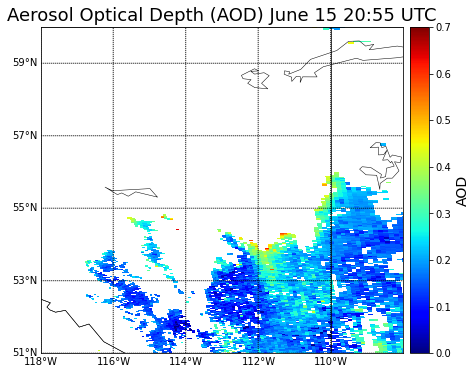

In [5]:
#for i in list_names15:
#file_i = path15 + i
# print(file_i)
# fileList = open(file_i, "rb")
file_i = "/data/edworak/aod_june15/MYD04_3K.A2021166.2055.061.2021167153002.hdf"

#file_i = file_i.strip()
SDS_NAME = "Image_Optical_Depth_Land_And_Ocean"

hdf=SD.SD(file_i)

lat = hdf.select('Latitude')
latitude = lat[:]
min_lat = latitude.min()
max_lat = latitude.max()
lon = hdf.select("Longitude")
longitude = lon[:]
min_lon = longitude.min()
max_lon = longitude.max()

sds = hdf.select(SDS_NAME)
attributes = sds.attributes()
scale_factor = attributes["scale_factor"]
fillvalue = attributes["_FillValue"]

range = sds.getrange()
min_range = min(range)
max_range = max(range)

data = sds.get()
valid_data=data.ravel()
valid_data = [x for x in valid_data if x>= min_range]
valid_data = [x for x in valid_data if x>= max_range]
valid_data = np.asarray(valid_data)
valid_data = valid_data * scale_factor 

#print(data)

if len(data) > 0: 
    # average = sum(valid_data)/ len(valid_data)
    #print(data * scale_factor)
    average = np.mean(data * scale_factor)
    #print(average)
#average = sum(data)/ len(data)

scaled_data = data * scale_factor
print(np.mean(scaled_data[(scaled_data > 0)]))

stdev = np.std(data)

# map 
plt.figure(figsize=(12,6))

attrs = sds.attributes(full=1)
fillvalue = attrs["_FillValue"]
fv = fillvalue[0]

data = data.astype(float)
data[data ==fv] = np.nan
data = np.ma.masked_array(data, np.isnan(data))

m = Basemap(projection = "cyl", resolution = 'l', llcrnrlat = 51, urcrnrlat = 60, llcrnrlon = -118, urcrnrlon = -108)

m.drawcoastlines(linewidth = 0.5)
m.drawcountries()
m.drawstates()
m.drawparallels(np.arange(51, 60, 2), labels = [1, 0, 0, 0])
m.drawmeridians(np.arange(-118, -108, 2), labels = [0,0,0,1])

x, y = m(longitude, latitude)
m.pcolormesh(x, y, data*scale_factor, cmap= plt.cm.jet)
# plt.autoscale()

cb = m.colorbar()
cb.set_label("AOD", fontsize = 14)
plt.clim(0, 0.7)
plotTitle= file_i[:-4]
plt.title("Aerosol Optical Depth (AOD) June 15 {}:{} UTC".format( plotTitle[43:45], plotTitle[45:47], plotTitle[35:39]), fontsize = 18)

fig = plt.gcf()
plt.savefig("AOD_june15_20:55", dpi = 400)

## june 15 with 3x3 mean

In [6]:
fire_data15 = []

3x3 average: 0.05400000256486237
5x5 average: 0.056428574108784754


/tmp/ipykernel_345297/3430803540.py:119: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(x, y, data*scale_factor, cmap= plt.cm.jet, alpha = 0.7)


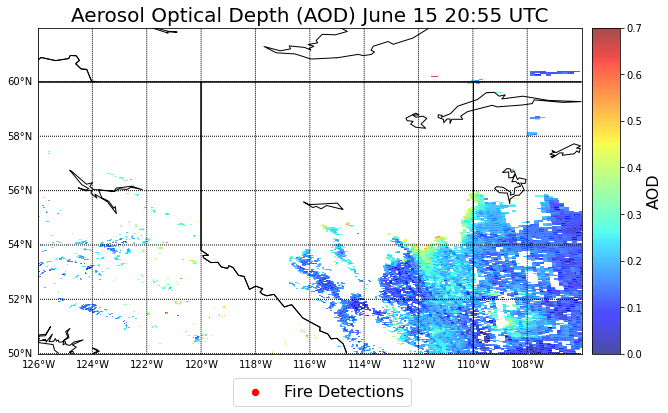

In [7]:

file_i = "/data/edworak/aod_june15/MYD04_3K.A2021166.2055.061.2021167153002.hdf"
SDS_NAME = "Image_Optical_Depth_Land_And_Ocean"
hdf=SD.SD(file_i)

lat = hdf.select('Latitude')
latitude = lat[:]
min_lat = latitude.min()
max_lat = latitude.max()
lon = hdf.select("Longitude")
longitude = lon[:]
min_lon = longitude.min()
max_lon = longitude.max()

sds = hdf.select(SDS_NAME)
attributes = sds.attributes()
scale_factor = attributes["scale_factor"]
fillvalue = attributes["_FillValue"]

range = sds.getrange()
min_range = min(range)
max_range = max(range)

data = sds.get()
valid_data=data.ravel()
valid_data = [x for x in valid_data if x>= min_range]
valid_data = [x for x in valid_data if x>= max_range]
valid_data = np.asarray(valid_data)
valid_data = valid_data * scale_factor 

if len(data) > 0: 
    average = np.mean(data * scale_factor)

stdev = np.std(data)

# distance between points 
user_lat = 53
user_lon = -110

R = 63710000
lat1 = np.radians(user_lat)
lat = np.radians(latitude)
delta_lat = np.radians(latitude - user_lat)
delta_lon = np.radians(longitude - user_lon)
a = (np.sin(delta_lat/2))* (np.sin(delta_lat/2)) + (np.cos(lat1/2))
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
d = R * c

x, y = np.unravel_index(d.argmin(), d.shape)

# 3 x 3: calculates mean, median, stdev in 3x3 grid around point 

if x<1: 
    x += 1
if x > data.shape[0]-2: 
    x -= 2
if y < 1: 
    y += 1
if y > data.shape[1]-2: 
    y-=2

data[x,y] == fillvalue
three_by_three = data[x-1:x+2, y-1: y+2]
three_by_three = three_by_three.astype(float)
three_by_three[three_by_three == float(fillvalue)] = np.nan
nnan = np.count_nonzero(~np.isnan(three_by_three))
if nnan == 0: 
    print("no valid pixels in 3x3 grid")
else: 
    three_by_three = three_by_three * scale_factor
    three_by_three_average = np.nanmean(three_by_three)
    print("3x3 average: {}".format(three_by_three_average))
    three_by_three_std = np.nanstd(three_by_three)
    three_by_three_median = np.nanmedian(three_by_three)
    
    
# 5x5: calculates mean, median, stdev in 5x5 grid around point 
if x<2: 
    x += 1
if x > data.shape[0]-3: 
    x -= 1
if y < 2: 
    y += 1
if y > data.shape[1]-3: 
    y-=1
    
data[x,y] == fillvalue
five_by_five = data[x-2:x+3, y-2: y+3]
five_by_five = five_by_five.astype(float)
five_by_five[five_by_five == float(fillvalue)] = np.nan
nnan = np.count_nonzero(~np.isnan(five_by_five))
if nnan == 0: 
    print("no valid pixels in 3x3 grid")
else: 
    five_by_five = five_by_five * scale_factor
    five_by_five_average = np.nanmean(five_by_five)
    print("5x5 average: {}".format(five_by_five_average))
    five_by_five_std = np.nanstd(five_by_five)
    five_by_five_median = np.nanmedian(five_by_five)
    
# map 
plt.figure(figsize=(12,6))

attrs = sds.attributes(full=1)
fillvalue = attrs["_FillValue"]
fv = fillvalue[0]

data = data.astype(float)
data[data ==fv] = np.nan
data = np.ma.masked_array(data, np.isnan(data))

m = Basemap(projection = "cyl", resolution = 'l', llcrnrlat = 50, urcrnrlat = 62, llcrnrlon = -126, urcrnrlon = -106)
m.drawcoastlines(linewidth = 1, zorder=5)
m.drawcountries(linewidth = 1, zorder=5)
m.drawstates(linewidth = 1, zorder=5)
m.drawparallels(np.arange(50, 62, 2), labels = [1, 0, 0, 0])
m.drawmeridians(np.arange(-126, -106, 2), labels = [0,0,0,1])

x, y = m(longitude, latitude)
m.pcolormesh(x, y, data*scale_factor, cmap= plt.cm.jet, alpha = 0.7)
# plt.autoscale()

cb = m.colorbar()
cb.set_label("AOD", fontsize = 16)
plt.clim(0, 0.7)

# x1,y1 = map(-110,55)
# x2,y2 = map(-110,58)
# x3,y3 = map(-116,58)
# x4,y4 = map(-116,55)
# poly = Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)],facecolor='none',edgecolor='orange',linewidth=3, zorder=10)
# plt.gca().add_patch(poly)

# hour 20 region minx=-110,maxx=-116,miny=55,maxy=58

plt.scatter(x = fire_data15, y = fire_data15,  color = "red", marker = "o", s = 40, zorder = 15, label = "Fire Detections")
plt.legend(fontsize = 16, bbox_to_anchor=(0.7, -0.05))

plotTitle= file_i[:-4]
plt.title("Aerosol Optical Depth (AOD) June 15 {}:{} UTC".format( plotTitle[43:45], plotTitle[45:47], plotTitle[35:39]), fontsize = 20)
fig = plt.gcf()
plt.savefig("AOD_june15_20:55", dpi = 400)

## june 29

/data/edworak/aod_june29/MYD04_3K.A2021180.1930.061.2021181154837.hdf
no valid pixels in 3x3 grid
no valid pixels in 5x5 grid


/tmp/ipykernel_345297/3119894230.py:135: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(x, y, data*scale_factor, cmap= plt.cm.jet, alpha = 0.7)


TypeError: 'int' object is not iterable

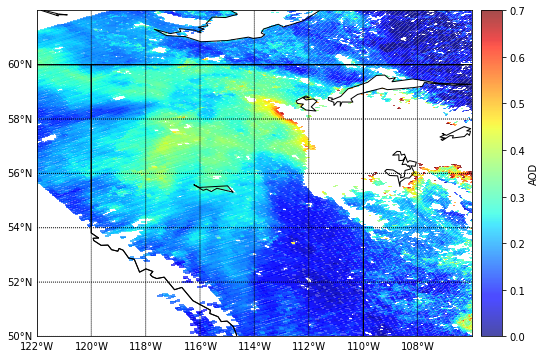

In [8]:
#for i in list_names29:
# file_i = path29 +  i

file_i = '/data/edworak/aod_june29/MYD04_3K.A2021180.1930.061.2021181154837.hdf'
print(file_i)
# fileList = open(file_i, "rb")

# file_i = file_i.strip()
SDS_NAME = "Image_Optical_Depth_Land_And_Ocean"

hdf=SD.SD(file_i)

lat = hdf.select('Latitude')
latitude = lat[:]
min_lat = latitude.min()
max_lat = latitude.max()
lon = hdf.select("Longitude")
longitude = lon[:]
min_lon = longitude.min()
max_lon = longitude.max()

sds = hdf.select(SDS_NAME)
attributes = sds.attributes()
scale_factor = attributes["scale_factor"]
fillvalue = attributes["_FillValue"]

range = sds.getrange()
min_range = min(range)
max_range = max(range)

data = sds.get()
valid_data=data.ravel()
valid_data = [x for x in valid_data if x>= min_range]
valid_data = [x for x in valid_data if x>= max_range]
valid_data = np.asarray(valid_data)
valid_data = valid_data * scale_factor 


#average = sum(valid_data)/ len(valid_data)
# scaled_data = (data * scale_factor)[((data * scale_factor) > 0)]
# print(np.mean(scaled_data))
stdev = np.std(data)

# distance between points 
user_lat = 57
user_lon = -116

R = 63710000
lat1 = np.radians(user_lat)
lat = np.radians(latitude)
delta_lat = np.radians(latitude - user_lat)
delta_lon = np.radians(longitude - user_lon)
a = (np.sin(delta_lat/2))* (np.sin(delta_lat/2)) + (np.cos(lat1/2))
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
d = R * c

x, y = np.unravel_index(d.argmin(), d.shape)

# 3 x 3: calculates mean, median, stdev in 3x3 grid around point 

if x<1: 
    x += 1
if x > data.shape[0]-2: 
    x -= 2
if y < 1: 
    y += 1
if y > data.shape[1]-2: 
    y-=2
    
data[x,y] == fillvalue
three_by_three = data[x-1:x+2, y-1: y+2]
three_by_three = three_by_three.astype(float)
three_by_three[three_by_three == float(fillvalue)] = np.nan
nnan = np.count_nonzero(~np.isnan(three_by_three))
if nnan == 0: 
    print("no valid pixels in 3x3 grid")
else: 
    three_by_three = three_by_three * scale_factor
    three_by_three_average = np.nanmean(three_by_three)
    print("3x3 average: {}".format(three_by_three_average))
    three_by_three_std = np.nanstd(three_by_three)
    three_by_three_median = np.nanmedian(three_by_three)
    
# 5x5: calculates mean, median, stdev in 5x5 grid around point 

if x<2: 
    x += 1
if x > data.shape[0]-3: 
    x -= 1
if y < 2: 
    y += 1
if y > data.shape[1]-3: 
    y-=1
    
data[x,y] == fillvalue
five_by_five = data[x-2:x+3, y-2: y+3]
five_by_five = five_by_five.astype(float)
five_by_five[five_by_five == float(fillvalue)] = np.nan
nnan = np.count_nonzero(~np.isnan(five_by_five))
if nnan == 0: 
    print("no valid pixels in 5x5 grid")
else: 
    five_by_five = five_by_five * scale_factor
    five_by_five_average = np.nanmean(five_by_five)
    print("5x5 average: {}".format(five_by_five_average))
    five_by_five_std = np.nanstd(five_by_five)
    five_by_five_median = np.nanmedian(five_by_five)
      
# map 
plt.figure(figsize=(12,6))

attrs = sds.attributes(full=1)
fillvalue = attrs["_FillValue"]
fv = fillvalue[0]

data = data.astype(float)
data[data ==fv] = np.nan
data = np.ma.masked_array(data, np.isnan(data))

minlat = 55
maxlat = 61
minlon = -122
maxlon = -111 

m = Basemap(projection = "cyl", resolution = 'l', llcrnrlat = 50, urcrnrlat = 62, llcrnrlon = -122, urcrnrlon = -106)
# m = Basemap(projection = "cyl", resolution = 'l', llcrnrlat = 40, urcrnrlat = 65, llcrnrlon = -130, urcrnrlon = -100)

m.drawcoastlines(linewidth = 1, zorder=5)
m.drawcountries(linewidth = 1, zorder=5)
m.drawstates(linewidth = 1, zorder=5)
m.drawparallels(np.arange(50, 62, 2), labels = [1, 0, 0, 0])
m.drawmeridians(np.arange(-122, -106, 2), labels = [0,0,0,1])

x, y = m(longitude, latitude)
m.pcolormesh(x, y, data*scale_factor, cmap= plt.cm.jet, alpha = 0.7)
# plt.autoscale()

cb = m.colorbar()
cb.set_label("AOD")
plt.clim(0, 0.7)


x1,y1 = map(-120,57)
x2,y2 = map(-120,61)
x3,y3 = map(-114,61)
x4,y4 = map(-114,57)
poly = Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)],facecolor='none',edgecolor='orange',linewidth=3, zorder=10)
plt.gca().add_patch(poly)


x11,y11 = map(-113,55)
x22,y22 = map(-113,59)
x33,y33 = map(-106.2,59)
x44,y44 = map(-106.2,55)
poly1 = Polygon([(x11,y11),(x22,y22),(x33,y33),(x44,y44)],facecolor='none',edgecolor='red',linewidth=3, zorder=10)
plt.gca().add_patch(poly1)

plotTitle= file_i[:-4]
plt.title("{0} {1} {2}:{3}".format(plotTitle[35:39], plotTitle[39:42], plotTitle[43:45], plotTitle[45:47]), fontsize = 20)
#plt.title('Satellite Image: {}'.format(plotTitle.strftime('%d %B %Y %H:%M')), fontsize = 20) #loc='right'

fig = plt.gcf()
plt.savefig("AOD_june29_19:30", dpi = 400)

## june 29 fires 

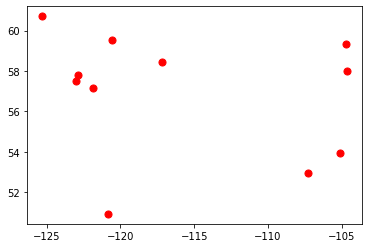

In [10]:
data1 = [[ 50.926 , -120.828], [57.516, -122.998], [57.786, -122.879], [57.155, -121.865], [60.712, -125.303], 
             [59.549, -120.595], [58.439, -117.196], [59.332, -104.729],  [57.986, -104.683],  [53.943, -105.096],  
             [52.968, -107.266]]

fire_data = pd.DataFrame(data1, columns=['Lat', 'Lon'])
fire_data
plt.scatter(x = fire_data.Lon, y = fire_data.Lat,  color = "red", marker = "o", s = 50, zorder = 15)


/data/edworak/aod_june29/MYD04_3K.A2021180.1930.061.2021181154837.hdf
no valid pixels in 3x3 grid
no valid pixels in 5x5 grid


/tmp/ipykernel_345297/148405270.py:135: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(x, y, data*scale_factor, cmap= plt.cm.jet, alpha = 0.7)


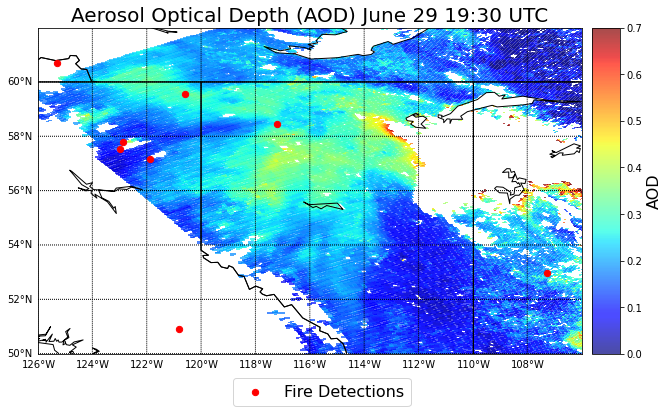

In [11]:
#for i in list_names29:
# file_i = path29 +  i

file_i = '/data/edworak/aod_june29/MYD04_3K.A2021180.1930.061.2021181154837.hdf'
print(file_i)
# fileList = open(file_i, "rb")

# file_i = file_i.strip()
SDS_NAME = "Image_Optical_Depth_Land_And_Ocean"

hdf=SD.SD(file_i)

lat = hdf.select('Latitude')
latitude = lat[:]
min_lat = latitude.min()
max_lat = latitude.max()
lon = hdf.select("Longitude")
longitude = lon[:]
min_lon = longitude.min()
max_lon = longitude.max()

sds = hdf.select(SDS_NAME)
attributes = sds.attributes()
scale_factor = attributes["scale_factor"]
fillvalue = attributes["_FillValue"]

range = sds.getrange()
min_range = min(range)
max_range = max(range)

data = sds.get()
valid_data=data.ravel()
valid_data = [x for x in valid_data if x>= min_range]
valid_data = [x for x in valid_data if x>= max_range]
valid_data = np.asarray(valid_data)
valid_data = valid_data * scale_factor 


#average = sum(valid_data)/ len(valid_data)
# scaled_data = (data * scale_factor)[((data * scale_factor) > 0)]
# print(np.mean(scaled_data))
stdev = np.std(data)

# distance between points 
user_lat = 57
user_lon = -116

R = 63710000
lat1 = np.radians(user_lat)
lat = np.radians(latitude)
delta_lat = np.radians(latitude - user_lat)
delta_lon = np.radians(longitude - user_lon)
a = (np.sin(delta_lat/2))* (np.sin(delta_lat/2)) + (np.cos(lat1/2))
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
d = R * c

x, y = np.unravel_index(d.argmin(), d.shape)

# 3 x 3: calculates mean, median, stdev in 3x3 grid around point 

if x<1: 
    x += 1
if x > data.shape[0]-2: 
    x -= 2
if y < 1: 
    y += 1
if y > data.shape[1]-2: 
    y-=2
    
data[x,y] == fillvalue
three_by_three = data[x-1:x+2, y-1: y+2]
three_by_three = three_by_three.astype(float)
three_by_three[three_by_three == float(fillvalue)] = np.nan
nnan = np.count_nonzero(~np.isnan(three_by_three))
if nnan == 0: 
    print("no valid pixels in 3x3 grid")
else: 
    three_by_three = three_by_three * scale_factor
    three_by_three_average = np.nanmean(three_by_three)
    print("3x3 average: {}".format(three_by_three_average))
    three_by_three_std = np.nanstd(three_by_three)
    three_by_three_median = np.nanmedian(three_by_three)
    
# 5x5: calculates mean, median, stdev in 5x5 grid around point 

if x<2: 
    x += 1
if x > data.shape[0]-3: 
    x -= 1
if y < 2: 
    y += 1
if y > data.shape[1]-3: 
    y-=1
    
data[x,y] == fillvalue
five_by_five = data[x-2:x+3, y-2: y+3]
five_by_five = five_by_five.astype(float)
five_by_five[five_by_five == float(fillvalue)] = np.nan
nnan = np.count_nonzero(~np.isnan(five_by_five))
if nnan == 0: 
    print("no valid pixels in 5x5 grid")
else: 
    five_by_five = five_by_five * scale_factor
    five_by_five_average = np.nanmean(five_by_five)
    print("5x5 average: {}".format(five_by_five_average))
    five_by_five_std = np.nanstd(five_by_five)
    five_by_five_median = np.nanmedian(five_by_five)
      
# map 
plt.figure(figsize=(12,6))

attrs = sds.attributes(full=1)
fillvalue = attrs["_FillValue"]
fv = fillvalue[0]

data = data.astype(float)
data[data ==fv] = np.nan
data = np.ma.masked_array(data, np.isnan(data))

minlat = 55
maxlat = 61
minlon = -122
maxlon = -111 

m = Basemap(projection = "cyl", resolution = 'l', llcrnrlat = 50, urcrnrlat = 62, llcrnrlon = -126, urcrnrlon = -106)
# m = Basemap(projection = "cyl", resolution = 'l', llcrnrlat = 40, urcrnrlat = 65, llcrnrlon = -130, urcrnrlon = -100)

m.drawcoastlines(linewidth = 1, zorder=5)
m.drawcountries(linewidth = 1, zorder=5)
m.drawstates(linewidth = 1, zorder=5)
m.drawparallels(np.arange(50, 62, 2), labels = [1, 0, 0, 0])
m.drawmeridians(np.arange(-126, -106, 2), labels = [0,0,0,1])

x, y = m(longitude, latitude)
m.pcolormesh(x, y, data*scale_factor, cmap= plt.cm.jet, alpha = 0.7)
# plt.autoscale()

cb = m.colorbar()
cb.set_label("AOD", fontsize = 16)
plt.clim(0, 0.7)

### add region boxes 

# x1,y1 = map(-120,57)
# x2,y2 = map(-120,61)
# x3,y3 = map(-114,61)
# x4,y4 = map(-114,57)
# poly = Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)],facecolor='none',edgecolor='orange',linewidth=3, zorder=10)
# plt.gca().add_patch(poly)

# x11,y11 = map(-113,55)
# x22,y22 = map(-113,59)
# x33,y33 = map(-106.2,59)
# x44,y44 = map(-106.2,55)
# poly1 = Polygon([(x11,y11),(x22,y22),(x33,y33),(x44,y44)],facecolor='none',edgecolor='red',linewidth=3, zorder=10)
# plt.gca().add_patch(poly1)


### add fires 
plt.scatter(x = fire_data.Lon, y = fire_data.Lat,  color = "red", marker = "o", s = 40, zorder = 15, label = "Fire Detections")
plt.legend(fontsize = 16, bbox_to_anchor=(0.7, -0.05))

plotTitle= file_i[:-4]
# plt.title("{0} {1} {2}:{3}".format(plotTitle[35:39], plotTitle[39:42], plotTitle[43:45], plotTitle[45:47]), fontsize = 20)
plt.title("Aerosol Optical Depth (AOD) June 29 {}:{} UTC".format( plotTitle[43:45], plotTitle[45:47], plotTitle[35:39]), fontsize = 20)

#plt.title('Satellite Image: {}'.format(plotTitle.strftime('%d %B %Y %H:%M')), fontsize = 20) #loc='right'

fig = plt.gcf()
plt.savefig("AOD_june29", dpi = 400, bbox_inches = "tight")

## together as subplots 

## june 28

### june 28 fires

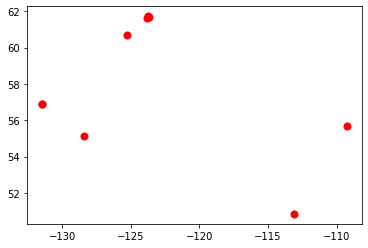

In [12]:
data28 = [[56.908, -131.461], [55.161,-128.396 ], [60.715, -125.275], [56.908, -131.46], 
          [61.66, -123.67], [61.63, -123.83], [61.722 ,-123.752], [50.847,-113.064], [55.7, -109.27]]


fire_data28 = pd.DataFrame(data28, columns=['Lat', 'Lon'])
fire_data28
plt.scatter(x = fire_data28.Lon, y = fire_data28.Lat,  color = "red", marker = "o", s = 50, zorder = 15)


/data/edworak/aod_june28/MOD04_3K.A2021179.2010.061.2021268235051.hdf
0.11139320646358615


/tmp/ipykernel_345297/4263250386.py:101: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(x, y, data*scale_factor, cmap= plt.cm.jet, alpha = 0.7)


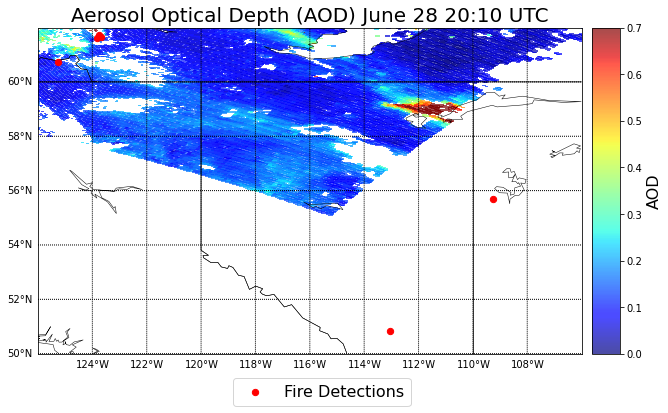

In [13]:
# for i in list_names28:
# file_i = path28 +  i

file_i = "/data/edworak/aod_june28/MOD04_3K.A2021179.2010.061.2021268235051.hdf"

print(file_i)
# fileList = open(file_i, "rb")

file_i = file_i.strip()
SDS_NAME = "Image_Optical_Depth_Land_And_Ocean"

hdf=SD.SD(file_i)

lat = hdf.select('Latitude')
latitude = lat[:]
min_lat = latitude.min()
max_lat = latitude.max()
lon = hdf.select("Longitude")
longitude = lon[:]
min_lon = longitude.min()
max_lon = longitude.max()

sds = hdf.select(SDS_NAME)
attributes = sds.attributes()
scale_factor = attributes["scale_factor"]
fillvalue = attributes["_FillValue"]

range = sds.getrange()
min_range = min(range)
max_range = max(range)

data = sds.get()
valid_data=data.ravel()
valid_data = [x for x in valid_data if x>= min_range]
valid_data = [x for x in valid_data if x>= max_range]
valid_data = np.asarray(valid_data)
valid_data = valid_data * scale_factor 

#print(data)

if len(valid_data) > 0: 
    average = sum(valid_data)/ len(valid_data)
    print(data * scale_factor)
    #average = np.mean(data * scale_factor)
#print(valid_data)
#average = sum(data)/ len(data)

scaled_data = data * scale_factor
print(np.mean(scaled_data[(scaled_data > 0)]))

stdev = np.std(data)
# 5x5: calculates mean, median, stdev in 5x5 grid around point 

#     if x<2: 
#         x += 1
#     if x > data.shape[0]-3: 
#         x -= 1
#     if y < 2: 
#         y += 1
#     if y > data.shape[1]-3: 
#         y-=1

#     data[x,y] == fillvalue
#     five_by_five = data[x-2:x+3, y-2: y+3]
#     five_by_five = five_by_five.astype(float)
#     five_by_five[five_by_five == float(fillvalue)] = np.nan
#     nnan = np.count_nonzero(~np.isnan(five_by_five))
#     if nnan == 0: 
#         print("no valid pixels in 3x3 grid")
#     else: 
#         five_by_five = five_by_five * scale_factor
#         five_by_five_average = np.nanmean(five_by_five)
#         print("5x5 average: {}".format(five_by_five_average))
#         five_by_five_std = np.nanstd(five_by_five)
#         five_by_five_median = np.nanmedian(five_by_five)

# map 
plt.figure(figsize=(12,6))

attrs = sds.attributes(full=1)
fillvalue = attrs["_FillValue"]
fv = fillvalue[0]

data = data.astype(float)
data[data ==fv] = np.nan
data = np.ma.masked_array(data, np.isnan(data))

minlat = 55
maxlat = 61
minlon = -122
maxlon = -111 
m = Basemap(projection = "cyl", resolution = 'l', llcrnrlat = 50, urcrnrlat = 62, llcrnrlon = -126, urcrnrlon = -106)

m.drawcoastlines(linewidth = 0.5)
m.drawcountries()
m.drawstates()
m.drawparallels(np.arange(50, 62, 2), labels = [1, 0, 0, 0])
m.drawmeridians(np.arange(-124, -106, 2), labels = [0,0,0,1])

x, y = m(longitude, latitude)
m.pcolormesh(x, y, data*scale_factor, cmap= plt.cm.jet, alpha = 0.7)
# plt.autoscale()


cb = m.colorbar()
cb.set_label("AOD", fontsize = 16)
plt.clim(0, 0.7)


### add fires 
plt.scatter(x = fire_data28.Lon, y = fire_data28.Lat,  color = "red", marker = "o", s = 40, zorder = 15, label = "Fire Detections")
plt.legend(fontsize = 16, bbox_to_anchor=(0.7, -0.05))

plotTitle= file_i[:-4]
# plt.title("{0} {1} {2}:{3}".format(plotTitle[35:39], plotTitle[39:42], plotTitle[43:45], plotTitle[45:47]), fontsize = 20)
plt.title("Aerosol Optical Depth (AOD) June 28 {}:{} UTC".format( plotTitle[43:45], plotTitle[45:47], plotTitle[35:39]), fontsize = 20)

#plt.title('Satellite Image: {}'.format(plotTitle.strftime('%d %B %Y %H:%M')), fontsize = 20) #loc='right'

fig = plt.gcf()
plt.savefig("AOD_june28", dpi = 400)

    